<a href="https://colab.research.google.com/github/gr1310/Deep-Learning/blob/main/ComplexNNArchitecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense, concatenate

In [5]:
from tensorflow.keras.datasets import mnist # dataset of handwritten numbers

In [6]:
(x_train, y_train) ,(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# For image dataset
# As value is between 0-255 for each pixel
# We should normalize
x_train = x_train/255
x_test = x_test/255

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

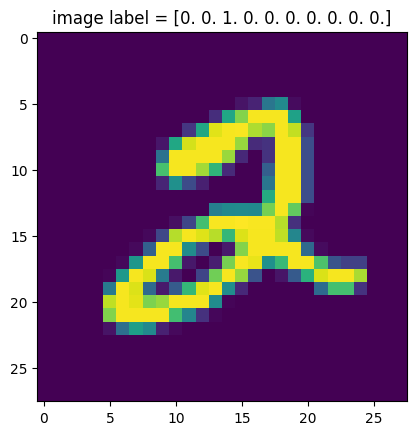

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5]) # 28 x 28 px image (HD image is 180 x 180)
plt.title(f"image label = {y_train[5]}")
plt.show()

In [10]:
import numpy as np

np.unique(y_train)

array([0., 1.])

In [19]:
input_layer = Input(shape=(28,28))
flatten = Flatten(input_shape=(28,28))(input_layer)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# Setting up the layers
hidden1 = Dense(128, activation='relu')(flatten) #(which layer it is connected to)
hidden2 = Dense(160, activation='relu')(flatten)
hidden1_1 = Dense(64, activation='relu')(hidden1)
merge = concatenate([hidden1_1, hidden2])
output_layer = Dense(10, activation='softmax')(merge)

In [21]:
# Creating the model
model = Model(inputs = input_layer, outputs = output_layer)

In [22]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │    100,480 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      8,256 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 160)       │    125,600 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 224)       │          0 │ dense_10[0][0],   │
│ (Concatenate)       │                   │            │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 10)        │      2,250 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 236,586 (924.16 KB)

 Trainable params: 236,586 (924.16 KB)

 Non-trainable params: 0 (0.00 B)

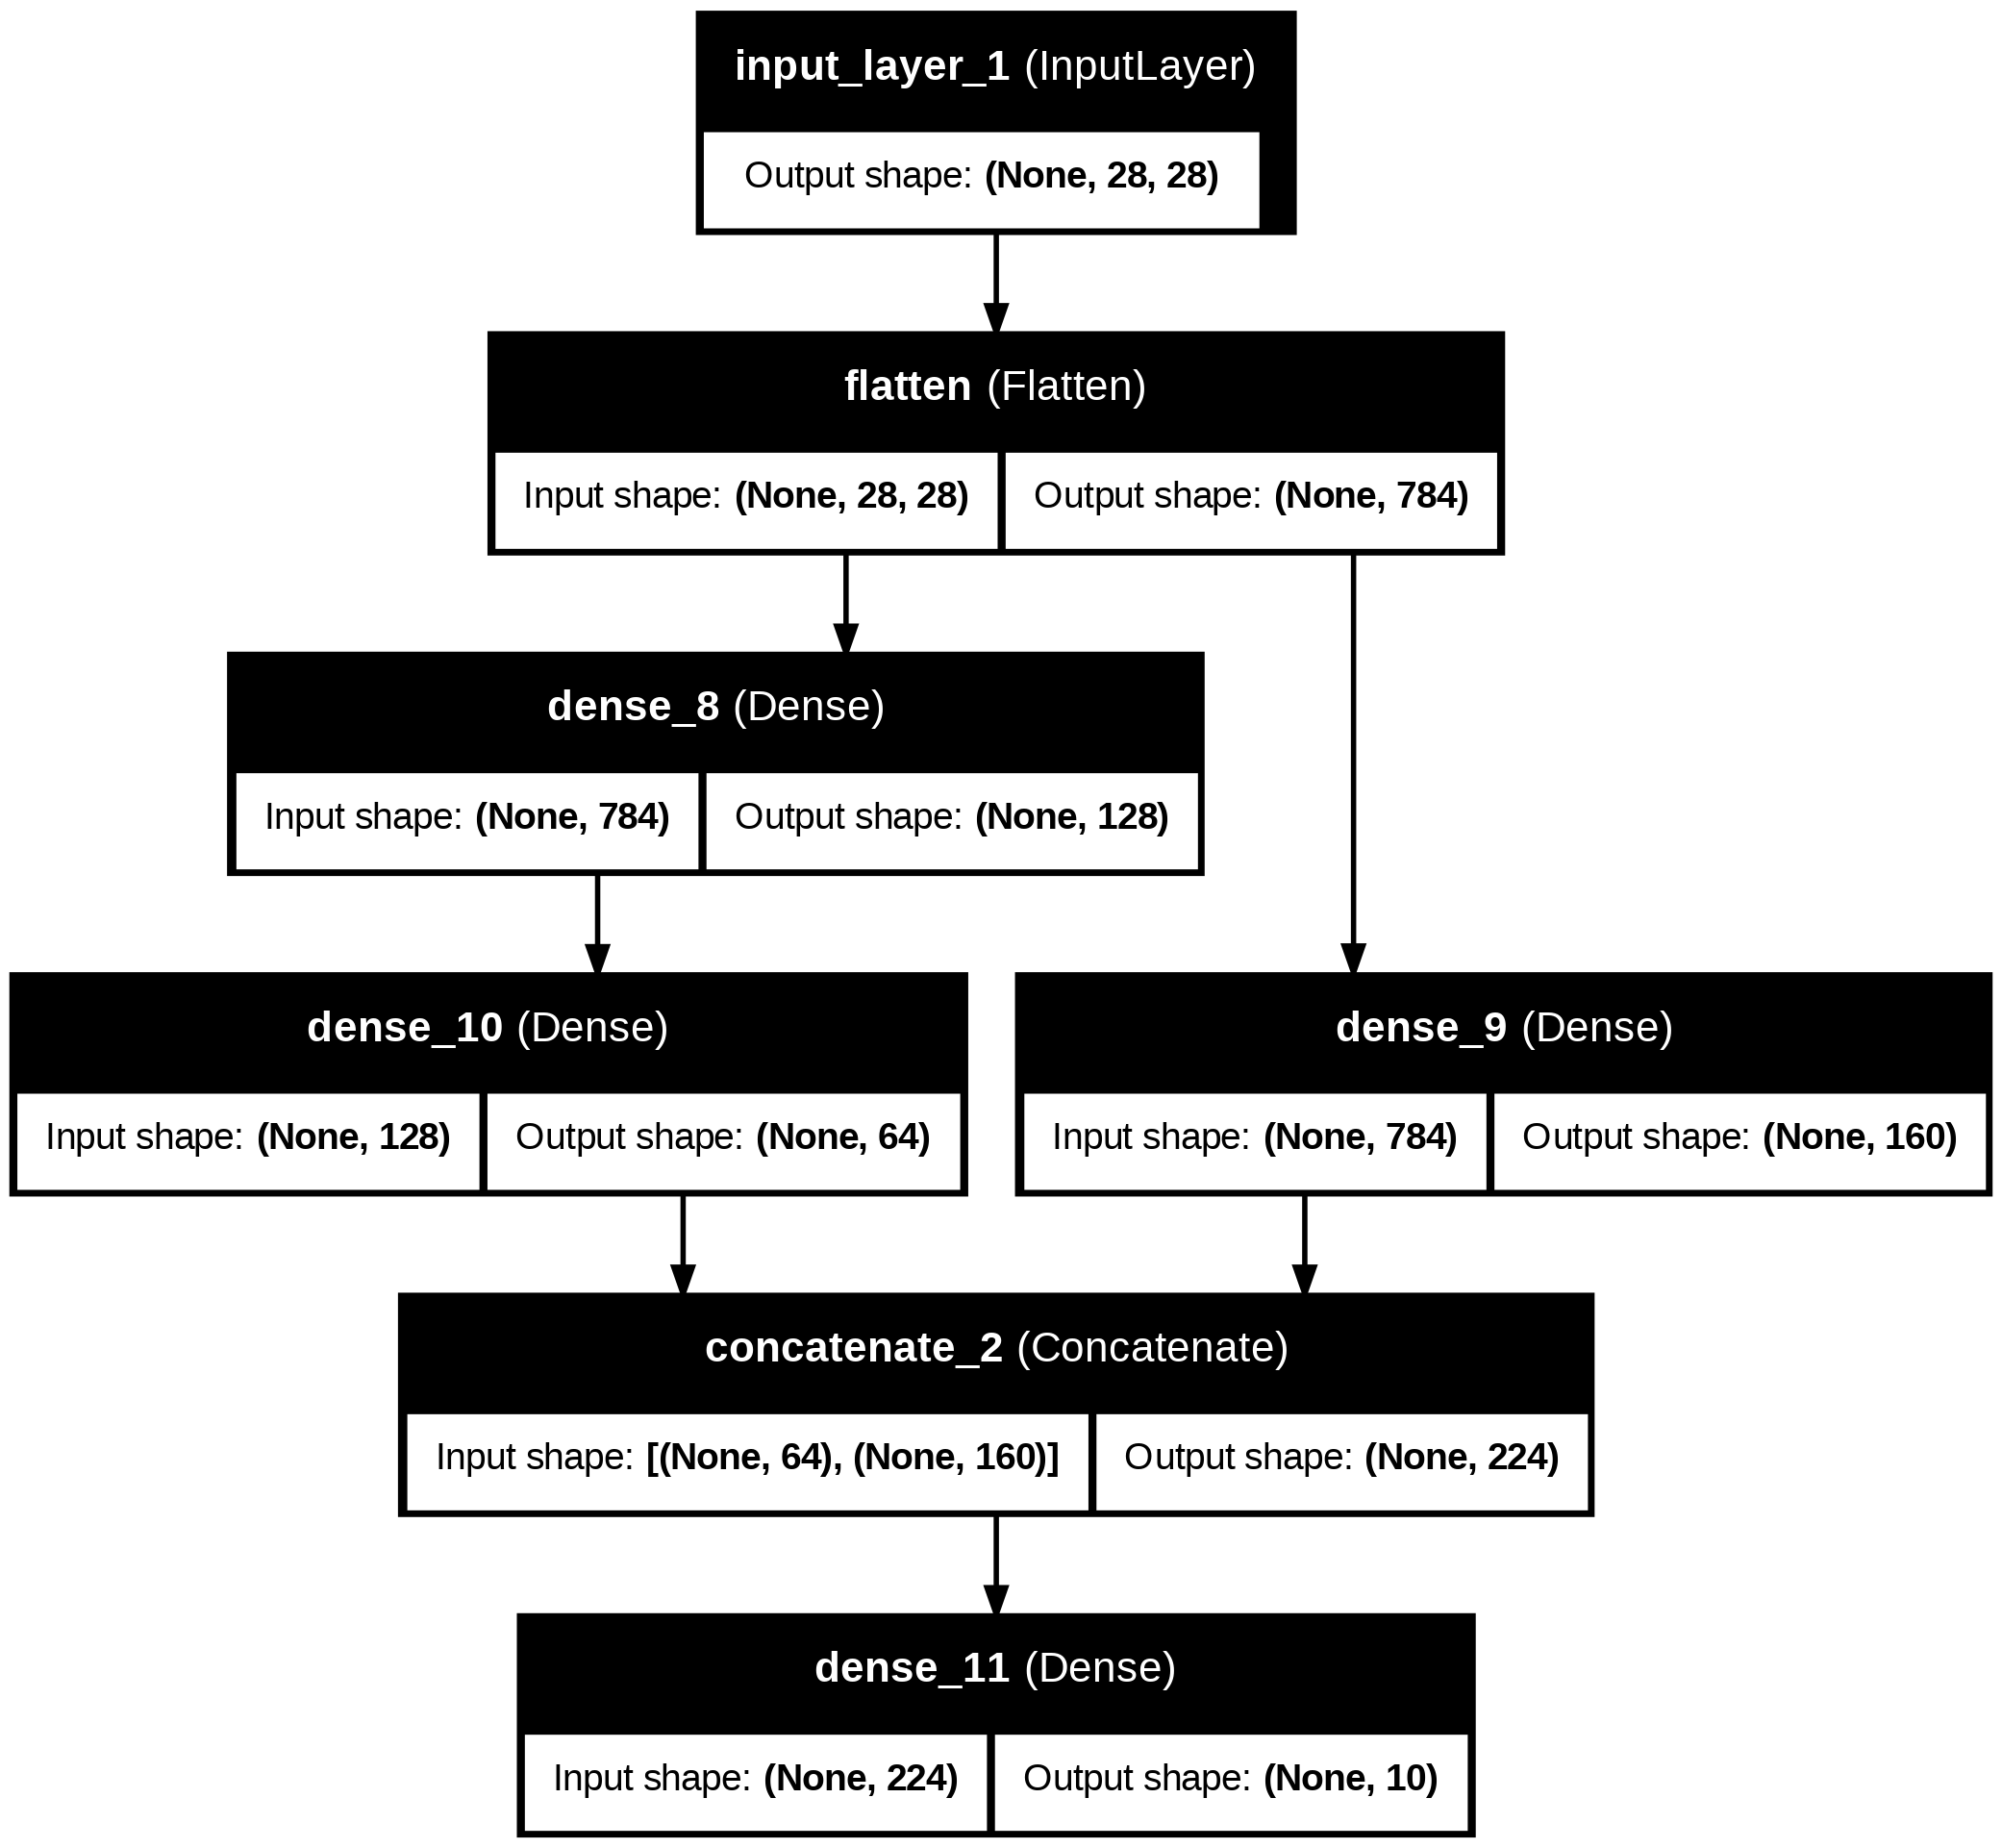

In [29]:
from keras.utils import plot_model

plot_model(model, show_shapes=True,show_layer_names=True)

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9556 - loss: 0.1503
Epoch 2/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9754 - loss: 0.0797
Epoch 3/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9829 - loss: 0.0553
Epoch 4/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9870 - loss: 0.0401
Epoch 5/5
1875/1875 - 11s - 6ms/step - accuracy: 0.9901 - loss: 0.0306


In [27]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.0955


[0.07973869144916534, 0.9758999943733215]